<a href="https://colab.research.google.com/github/dyjdlopez/intro-compvis/blob/main/modules/module_1_deeplearning_intro/cv_1_2_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Fundamentals of TensorFlow
Copyright D.Lopez 2024 | All Rights reserved <br><br>

[TensorFlow](https://www.tensorflow.org/) is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.<br>
TensorFlow provides several APIs that allow developers to develop a range of AI Apps from data estimation, computer vision, natural language processing, and even reinforcement learning.
![image](https://www.tensorflow.org/static/images/tf_logo_social.png)<br>





In [2]:
# !pip install tensorflow
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


## Part 1 Tensor Operations
TensorFlow mainly operates using tensors (as its name suggests), so let’s try to use our current knowledge about tensors and apply it to our current platform.

### 1.1 NumPy and TensorFlow
If you have enjoyed using matrices and tensors in NumPy, then performing tensor algebra in TensorFlow will just be a breeze.

In [3]:
np_tensor = np.array(3)
tf_tensor = tf.constant(3)

print(np_tensor)
print(tf_tensor)

3
tf.Tensor(3, shape=(), dtype=int32)


In [4]:
np_mat = np.array([
                   [1,2],
                   [3,1]
], dtype=float)
tf_mat = tf.constant([
                      [1,2],
                      [3,1]
], dtype=float)
print(np_mat)
print(tf_mat)

[[1. 2.]
 [3. 1.]]
tf.Tensor(
[[1. 2.]
 [3. 1.]], shape=(2, 2), dtype=float32)


In [5]:
type(tf_mat.numpy())

numpy.ndarray

In [6]:
A = tf_mat
B = tf.transpose(tf_mat)
print(f"Matrix A: \n{A}")
print(f"Matrix B: \n{B}")
print(f"Sum of Tensors: \n{A+B}")
print(f"Difference of Tensors: \n{A-B}")
print(f"Product of Tensors: \n{A*B}")

Matrix A: 
[[1. 2.]
 [3. 1.]]
Matrix B: 
[[1. 3.]
 [2. 1.]]
Sum of Tensors: 
[[2. 5.]
 [5. 2.]]
Difference of Tensors: 
[[ 0. -1.]
 [ 1.  0.]]
Product of Tensors: 
[[1. 6.]
 [6. 1.]]


In [7]:
print(f"Dot Product of Tensors: \n{A@B}")

Dot Product of Tensors: 
[[ 5.  5.]
 [ 5. 10.]]


In [8]:
C = tf.reshape(A, [4,1])
C

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [2.],
       [3.],
       [1.]], dtype=float32)>

## Part 2: Machine Learning Revisited
As we recall, machine learning takes in data and a program to produce a rule or determine a pattern as opposed with traditional program that requires a pattern or rule together with the data to create a working system.

Machine learning can be further classified into several cognitive paradigms:

<b>Supervised learning</b>— is a type of machine learning that requires input data to have a feature and a label or the typical X data and y label format. Supervised learning requires its dataset to be:
* Large (Volume)
* Various
* Valid

<b>Unsupervised learning</b>—unlike input data from supervised learning, unsupervised learning data doesn't have labels. Unsupervised learning aims to find patterns in unexplored data. Typical applications of unsupervised learning include dimension reduction and clustering.

<b>Reinforcement learning</b>—the inputs for a reinforcement learning algorithm require the little to n the form of a dataset) to succeed in education. Reinforcement learning aims to learn a rule, policy, or “way to do stuff” by determining whether its algorithm rewards or punishes its actions for a particular environment. The common uses of reinforcement learning included optimization.

We will focus on supervised learning using Deep Neural Networks in the succeeding topics.

### 2.1 The Neuron (Again)
![image](https://svitla.com/uploads/ckeditor/ArtificialNeuronModel_english.jpg)<br>

Recalling our last discussion with the neuron, we discovered that it is a neural network's basic unit. The learning process of the neuron consists of a feed-forward propagation in which it takes in several inputs which it is multiplied by some weights and fed into a transfer function and then subjected to an activation function and a backward propagation routine where it computes for the loss and cost of a neuron and uses the error value to update the weights and repeating until it converges (or even diverge) to a certain period of training.

In [9]:
#Features
X = np.arange(-1,5,dtype=float)
def fx(x): return 2*x-1
#Targets/Labels
y = np.array(list(map(fx,X)))

In [10]:
print(X)
print(y)

[-1.  0.  1.  2.  3.  4.]
[-3. -1.  1.  3.  5.  7.]


In [11]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MSE, MAE

In [12]:
### Dense Layer
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, input_shape=[1])
])
lr=0.01
model.compile(optimizer=SGD(learning_rate=lr),
              loss=MSE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history1 = model.fit(X,y,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 596ms/step - loss: 19.8168
Epoch 2/200
1/1 [==============================] - 0s 14ms/step - loss: 15.8563
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 12.7349
Epoch 4/200
1/1 [==============================] - 0s 14ms/step - loss: 10.2738
Epoch 5/200
1/1 [==============================] - 0s 20ms/step - loss: 8.3323
Epoch 6/200
1/1 [==============================] - 0s 15ms/step - loss: 6.7997
Epoch 7/200
1/1 [==============================] - 0s 18ms/step - loss: 5.5889
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 4.6314
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 3.8733
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 3.2721
Epoch 11/200
1/1 [==============================] - 0s 10ms/step - loss: 2.7945
Epoch 12/200
1/1 [==============================] - 0s 9ms/step - loss: 2.4142
Epoch 13/200
1/1 [=============================

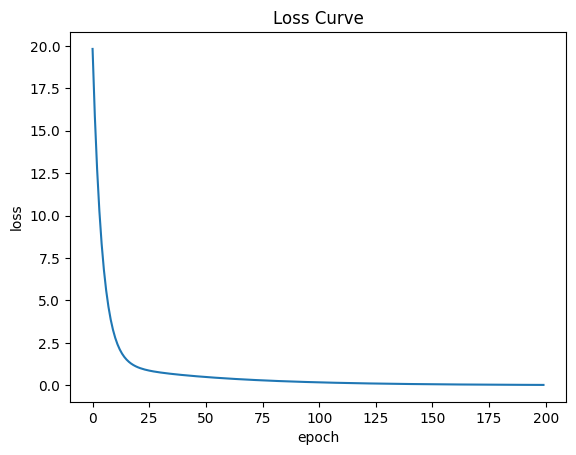

In [14]:
plt.title('Loss Curve')
plt.plot(history1.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [15]:
model.predict([10.0])

1/1 [==============================] - 0s 82ms/step


array([[18.565823]], dtype=float32)

## Part 3: Neural Networks

### 3.1 Multilayer Perceptron
![image](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

As the name suggests, a multilayer perceptron (MLP) is a network of neurons or perceptrons arranged and connected horizontally and vertically. In this setup, neurons share knowledge along their respective layer and pass the activated values to the following layers for a sense of "deep" learning. The concept of MLP gave rise to the new field of machine learning—Deep Learning, where we study Artificial Neural Networks (ANN).

An ANN consists of three parts:
* Input layer
* Hidden layer(s)
* Output layer
However, when counting the number of layers of a neural network, we exclude the input layer since no learning happens at the input layer or Layer 0 ($L0$).

In [16]:
### Multilayer Perceptron
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=16,input_shape=[1]), #Hidden Layer
  tf.keras.layers.Dense(units=1) #Output layer
])

lr=0.01
model.compile(optimizer=SGD(learning_rate=lr),
              loss=MSE)
model.summary()
history2=model.fit(X,y, epochs=200)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                32        
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 0s 481ms/step - loss: 19.9278
Epoch 2/200
1/1 [==============================] - 0s 14ms/step - loss: 8.8486
Epoch 3/200
1/1 [==============================] - 0s 16ms/step - loss: 4.1647
Epoch 4/200
1/1 [==============================] - 0s 16ms/step - loss: 2.0997
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 1.2668
Epoch 6/200
1/1 [

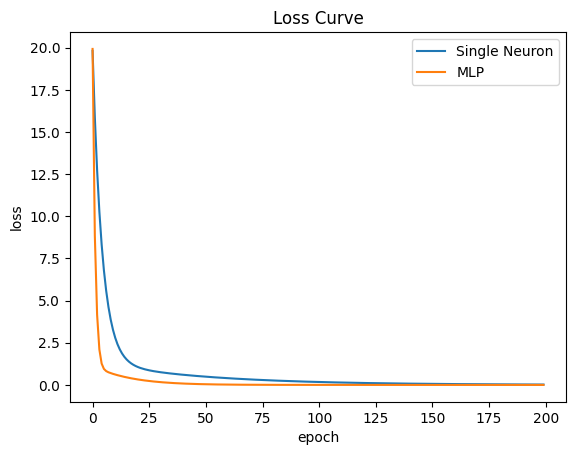

In [17]:
plt.title('Loss Curve')
plt.plot(history1.history['loss'], label='Single Neuron')
plt.plot(history2.history['loss'], label='MLP')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [18]:
model.predict([10.0])

1/1 [==============================] - 0s 63ms/step


array([[18.998528]], dtype=float32)

### 3.2 Activation Functions

![image](https://www.researchgate.net/profile/Junxi_Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm)

Back in our discussion about the neuron, we know that an activaiton function is quite crucial in getting the right values. Different activation functions are used for different objectives of learning. One factor to consider in choosing an activation function is the behavior of outputs per layer or the expected output of the machine learning task. Simply, identifying whether you are classifying data or predicting data could help which activation function to use.

For a deeper discussion and implementation check out:
* [Activation functions in TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
* [Activation functions in Keras](https://keras.io/api/layers/activations/)


In [19]:
from tensorflow.keras.layers import Activation
from tensorflow.nn import sigmoid, tanh, softmax, relu, leaky_relu

In [20]:
inputs = tf.constant([
                      [0.0,-1.2,2.4,32.0,-20.1]
                      ])
print(inputs)

tf.Tensor([[  0.   -1.2   2.4  32.  -20.1]], shape=(1, 5), dtype=float32)


In [21]:
### Sigmoid
sigmoid_layer = Activation(sigmoid)
sigmoid_layer(inputs).numpy()

array([[5.0000000e-01, 2.3147520e-01, 9.1682732e-01, 1.0000000e+00,
        1.8650081e-09]], dtype=float32)

In [22]:
### Tanh
tanh_layer = Activation(tanh)
tanh_layer(inputs).numpy()

array([[ 0.        , -0.8336547 ,  0.98367494,  1.        , -1.        ]],
      dtype=float32)

In [23]:
### Softmax
softmax_layer = Activation(softmax)
softmax_layer(inputs).numpy()

array([[1.2664166e-14, 3.8143706e-15, 1.3959928e-13, 1.0000000e+00,
        2.3618817e-23]], dtype=float32)

In [24]:
### ReLU
relu_layer = Activation(relu)
relu_layer(inputs).numpy()

array([[ 0. ,  0. ,  2.4, 32. ,  0. ]], dtype=float32)

In [25]:
### Leaky ReLU
lrelu_layer = Activation(leaky_relu)
lrelu_layer(inputs).numpy()

array([[ 0.        , -0.24000001,  2.4       , 32.        , -4.02      ]],
      dtype=float32)